<a href="https://colab.research.google.com/github/YeshwanthSadum/YeshwanthSadum-Data-Visualization-Projects/blob/main/BeautifulSoup_NIFTY_index_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fake_useragent

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=da5ff6e7e012056b7fd9f417ec9d9db946997d5b37dab836ff35d2cf8f63e2ce
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [2]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

ua = UserAgent()
header = {'user-agent':ua.chrome}
google_page = requests.get('https://in.investing.com/indices/s-p-cnx-nifty-historical-data?end_date=1642789800&interval_sec=weekly&st_date=1640111400&interval_sec=daily',headers=header)
print(google_page.content)

soup = BeautifulSoup(google_page.content,'lxml') # html.parser

#print(soup.prettify())

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


b'\n<!DOCTYPE html>\n<html lang="en-in" class="Other">\n<head>\n<title>Nifty 50 Historical Rates - Investing.com India</title>\n<meta name="description" content="Access free historical data for the S&P CNX Nifty." />\n<meta name="charset" content="utf-8" />\n<meta name="spaceShips" content="sdhgsg" />\n<meta http-equiv="x-ua-compatible" content="ie=edge" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" />\n<meta name="twitter:card" content="summary" />\n<meta name="twitter:site" content="@investing_ind" />\n<meta name="twitter:title" content="Nifty 50 Historical Rates - Investing.com India" />\n<meta name="twitter:description" content="Access free historical data for the S&amp;P CNX Nifty." />\n<meta name="twitter:image" content="https://i-invdn-com.investing.com/redesign/images/seo/investing_300X300.png" />\n<meta property="og:title" content="Nifty 50 Historical Rates - Investing.com India" />\n<meta property="og:description" content="Access fre

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(np.arange(1000))
df['date'] = soup.find('td', class_ = 'col-rowDate').text[1:-1]
df['price'] = soup.find('td', class_ = 'col-rowDate').next_sibling.next_sibling.text[1:-1]

In [5]:
i =0
for date in soup.find_all('td', class_ = 'col-rowDate'):
  df['date'][i] = date.text[1:-1]
  i=i+1

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,date,price
0,0,"Jan 21, 2022","17,617.15"
1,1,"Jan 20, 2022","17,617.15"
2,2,"Jan 19, 2022","17,617.15"
3,3,"Jan 18, 2022","17,617.15"
4,4,"Jan 17, 2022","17,617.15"


In [6]:
 i = 0
 for price in soup.find_all('td', class_ = 'col-rowDate'):
   df['price'][i] = price.next_sibling.next_sibling.text[1:-1]
   i=i+1
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,date,price
0,0,"Jan 21, 2022","17,617.15"
1,1,"Jan 20, 2022","17,757.00"
2,2,"Jan 19, 2022","17,938.40"
3,3,"Jan 18, 2022","18,113.05"
4,4,"Jan 17, 2022","18,308.10"


In [7]:
df= df.drop(0, axis = 1)


In [8]:
df = df.drop_duplicates(['price'])

In [9]:
print(df.shape)
df.head()

for i in range(len(df)):
 df['price'][i] = float(df['price'][i].replace(',', ''))

(23, 2)


In [10]:
df = df.iloc[::-1]

In [11]:
df

,date,price
22,"Dec 22, 2021",16955.45
21,"Dec 23, 2021",17072.6
20,"Dec 24, 2021",17003.75
19,"Dec 27, 2021",17086.25
18,"Dec 28, 2021",17233.25
17,"Dec 29, 2021",17213.6
16,"Dec 30, 2021",17203.95
15,"Dec 31, 2021",17354.05
14,"Jan 03, 2022",17625.7
13,"Jan 04, 2022",17805.25


In [12]:
df.to_csv('file_name.csv')

<function matplotlib.pyplot.show>

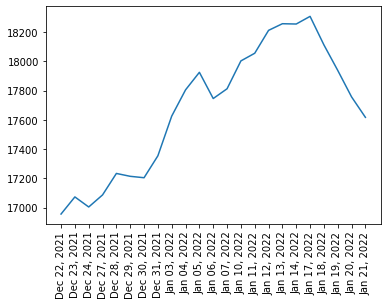

In [18]:
import matplotlib.pyplot as plt
plt.plot(df['date'],df['price'])
plt.xticks(rotation = 90)
plt.show


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

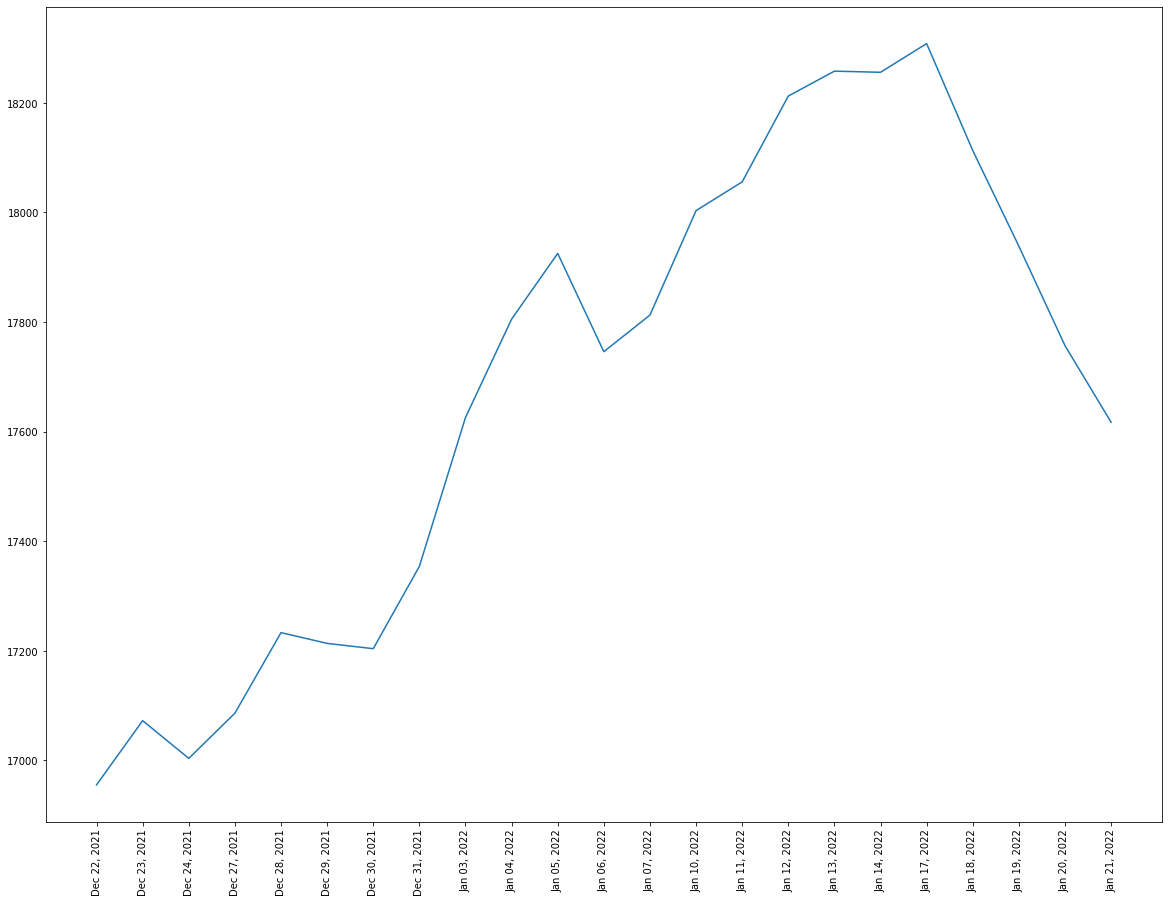

In [39]:
import matplotlib.pyplot as plt
plt.plot(df['date'],df['price'])
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = [20, 15]
display(plt)


No handles with labels found to put in legend.


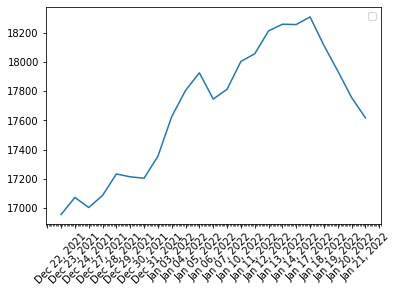

In [15]:
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.ticker import MultipleLocator

plt.plot(df['date'], df['price'])
plt.legend()
ax = plt.gca().get_xaxis()

ax.set_major_locator(MultipleLocator(1))
ax.set_minor_locator(MultipleLocator(0.1))
#ax.set_major_formatter(dates.DateFormatter('%Y-%b-%d'))

for item in ax.get_ticklabels():
    item.set_rotation(45)